In [81]:
from qiskit import *
import matplotlib
from qiskit.tools.visualization import plot_histogram

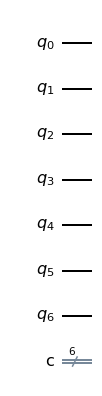

In [82]:
circuit = QuantumCircuit(6+1,6)
circuit.draw(output='mpl')

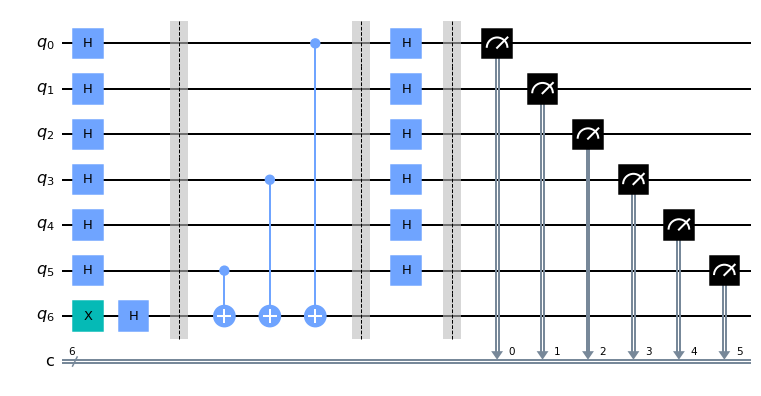

In [83]:
secret_number='1001010'
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier() #algorithm 
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output='mpl')

In [84]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
print(result.get_counts(circuit))

{'101001': 1}


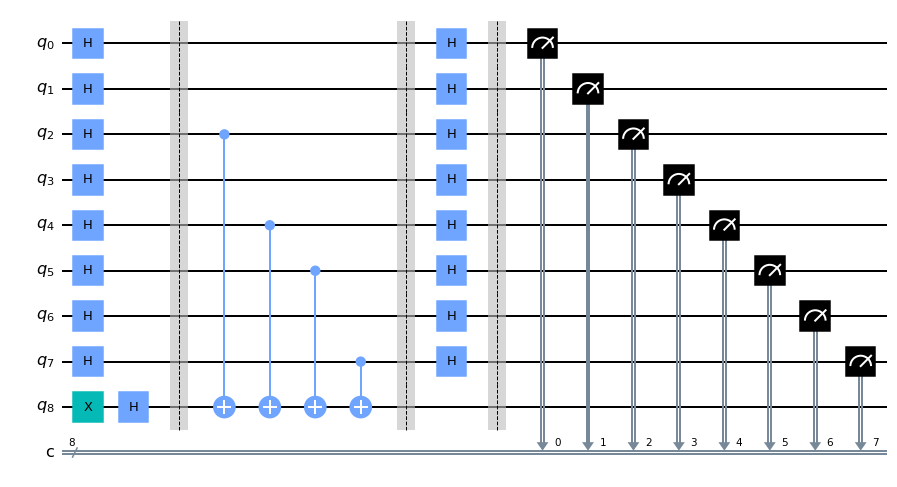

In [87]:
#general case 
secret_number1 ='10110100'
circuit = QuantumCircuit(len(secret_number1)+1,len(secret_number1))

circuit.h(range(len(secret_number1)))
circuit.x(len(secret_number1))
circuit.h(len(secret_number1))
circuit.barrier()
for ii, yesno in enumerate(reversed(secret_number1)):
    if yesno == '1':
        circuit.cx(ii, len(secret_number1))
circuit.barrier()
circuit.h(range(len(secret_number1)))
circuit.barrier() #algorithm 
circuit.measure(range(len(secret_number1)),range(len(secret_number1)))
circuit.draw(output='mpl')


In [92]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend= simulator).result()
counts=result.get_counts(circuit)
print(counts )

{'10110100': 1024}
